In [7]:
import networkx as nx
import csv
from matplotlib import pyplot as plt
%matplotlib inline

GWAS = nx.Graph()

def strip_list(l):
    k = []
    for e in l:
        k.append(e.strip())
    return k

snp_count = 0
gene_count = 0
trait_count = 0

with open('./GWAS-catloag-2015-Sept.txt') as GWASfile:
    GWASdata = csv.reader(GWASfile, delimiter='\t')
    for row in GWASdata:
        # each row has a ...
        # single nucleotide polymorphism
        snp = row[0]
        snp_count += 1
        GWAS.add_node(snp, node_type='snp')
        
        # associated genes
        genes = row[1].split(',')
        GWAS.add_nodes_from(strip_list(genes), node_type='gene')
        gene_count += len(genes)
        
        # associated traits
        traits = row[2].split(',')
        GWAS.add_nodes_from(traits, node_type='trait')
        trait_count += len(traits)
        
        # connect snps to genes, genes to assns
        for gene in genes:
            GWAS.add_edge(snp, gene.strip(), edge_type='snp->gene')
            for trait in traits:
                GWAS.add_edge(gene.strip(), trait, edge_type='gene->trait')
GWAS.remove_nodes_from([''])#,'NR','intergenic'])

In [8]:
N = GWAS.number_of_nodes()
L = GWAS.number_of_edges()
degrees = GWAS.degree().values()
kmin = min(degrees)
kmax = max(degrees)

print "N =", N
print "L =", L
print "kmin =", kmin
print "kmax =" ,kmax
print
print "N_snps =", snp_count
print "N_genes =", gene_count
print "N_traits =", trait_count

N = 27314
L = 41401
kmin = 0
kmax = 2417

N_snps = 25717
N_genes = 34337
N_traits = 26392


In [46]:
x_snp = -1.0
x_gene = 0
x_trait = 1.0

y_snp = 1.
y_gene = 1.
y_trait = 1.

pos = {}
colors = []

for n, d in GWAS.nodes_iter(data=True):
    if d['node_type'] == 'snp':
        pos[n] = [x_snp, y_snp]
        y_snp += 500
        #colors.append(0.9)
        colors.append('deeppink')
        
    elif d['node_type'] == 'gene':
        pos[n] = [x_gene, y_gene]
        y_gene += 700
        #colors.append(0.8)
        colors.append('purple')
        
    elif d['node_type'] == 'trait':
        pos[n] = [x_trait, y_trait]
        y_trait += 5000
        #colors.append(0.7)
        colors.append('crimson')

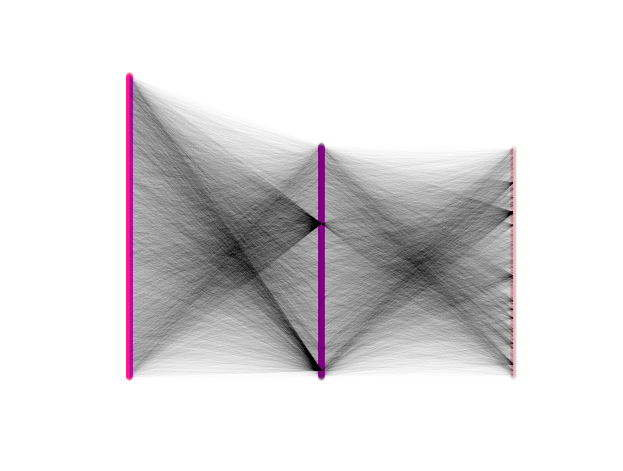

In [47]:
plt.figure(figsize=(8,6))   
nx.draw(GWAS, pos, node_color=colors, edge_color='black', alpha=0.006, node_size=50, linewidths=0.0)#, cmap='PuRd')

In [7]:
#import cPickle
#cPickle.dump(GWAS, open("gwas.pcl", "w"))